# Visualises Pure Neutron Matter (PNM) data

In [1]:
import numpy as np # arrays etcetera
import matplotlib.pyplot as plt # general plotting
import matplotlib as mpl # for figure quality (dpi)
import os # Dealing with paths

In [2]:
# Figure quality
mpl.rcParams['figure.dpi']= 100 # in notebook resolution
mpl.rc("savefig", dpi=400) # higher resolution when saving

# Formatting options
fs = 15 # fontsize

File paths

In [5]:
# Path to project files (You may need to change this)
currentDir = os.getcwd()
#dataDir = os.path.join(currentDir, '../../../Data')
dataDir = currentDir+'/../../Data'

# Stored model variations
# Baseline scenario \Lambda = 900 MeV
VARIATION = dataDir+"/DLW/QMC/Bag_Mass_Param_Used/1_Standard/"

# Bag model param.  -> /Bag_Mass_Param_Used/1_Standard/
#1_Standard
#2_L1-0
#3_L1-1
#4_L1-2
#5_L1-3
#6_L1-1_gsy1-3
#7_L1-3_gsy1-3
#8_L2-0_gsy1-9
#9_Increased_f_div_g
#10_Fock_ds
#11_Eff_Pro_Mass
#12_Eff_Pro_Mass_L1-1
#13_Eff_Pro_Mass_ds
#14_Dirac_Only
#15_Hartree
#16_R0-8
#17_App_S0_32-5
#18_App_S0_30
#19_S0_30
#20_Standard_BETA_N_ONLY
#21_MyQMC700 


# NJL model param. -> /NJL_Mass_Param_Used/1_NJL_Hartree/

#1_NJL_Hartree
#2_NJL_Standard
#3_NJL_L1-3
#4_NJL_Dirac_Only
#5_NJL_Fs1

# Select the data you wish to visualise 
DATA_PATH = VARIATION+"PNM/"

# Name of Model for plots (ENTER THE NAME YOU WANT HERE)
MODEL = r"A model"

# Path to other peoples data 
OTHERS_DATA= dataDir+"/OTHERS/"

## NeutronMatter Option Data Files

This file contains 7 columns: 

Density [fm$^{-3}$], pressure [MeVfm$^{-3}$], energy density [MeVfm$^{-3}$], binding energy per particle [MeV], ratio of total density/saturation density, eff. neutron mass [MeV], ratio of eff. neutron mass/ free neutron mass.

In [6]:
data = np.loadtxt(DATA_PATH+"pnm_eos.dat")
print(data.shape)

(315, 8)


## Energy per particle versus density

### Additional Data

#### N3LO CEFT, PRL 110, 032504 (2013) from K. Hebeler via J. Stone

Data from K. Hebeler via Jirina Stone. The reference for this data is PRL, 110, 032504 (2013), Neutron Matter at Next-to-Next-to-Next-to-Leading Order in Chiral Effective Field Theory by Tews et al. There are 2 columns for the following files:

Density [fm$^{-3}$] and energy per particle [MeV].

In [7]:
EGM450_500_lower = np.loadtxt(OTHERS_DATA+"Kai_Hebeler_N3LO_CEFT_PNM/"+"EGM450_500_lower.dat")

print(EGM450_500_lower.shape)

(22, 2)


In [8]:
EGM450_500_upper = np.loadtxt(OTHERS_DATA+"Kai_Hebeler_N3LO_CEFT_PNM/"+"EGM450_500_upper.dat")
print(EGM450_500_upper.shape)

(22, 2)


In [9]:
EGM450_500 = np.concatenate([EGM450_500_lower,EGM450_500_upper[::-1]])

In [10]:
EGM450_700_lower = np.loadtxt(OTHERS_DATA+"Kai_Hebeler_N3LO_CEFT_PNM/"+"EGM450_700_lower.dat")
print(EGM450_700_lower.shape)

(22, 2)


In [11]:
EGM450_700_upper = np.loadtxt(OTHERS_DATA+"Kai_Hebeler_N3LO_CEFT_PNM/"+"EGM450_700_upper.dat")
print(EGM450_700_upper.shape)

(22, 2)


In [12]:
EGM450_700 = np.concatenate([EGM450_700_lower,EGM450_700_upper[::-1]])

In [13]:
EM500_lower = np.loadtxt(OTHERS_DATA+"Kai_Hebeler_N3LO_CEFT_PNM/"+"EM500_lower.dat")
print(EM500_lower.shape)

(22, 2)


In [14]:
EM500_upper = np.loadtxt(OTHERS_DATA+"Kai_Hebeler_N3LO_CEFT_PNM/"+"EM500_upper.dat")
print(EM500_upper.shape)

(22, 2)


In [15]:
EM500 = np.concatenate([EM500_lower,EM500_upper[::-1]])

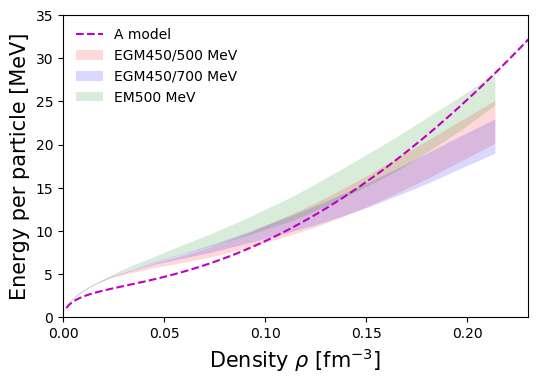

In [16]:
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)

# N3LO CEFT, PRL 110, 032504 (2013) from K. Hebeler via J. Stone
ax1.fill(EGM450_500[:,0],EGM450_500[:,1],'r',alpha=0.15,label=r"EGM450/500 MeV")
ax1.fill(EGM450_700[:,0],EGM450_700[:,1],'b',alpha=0.15,label=r"EGM450/700 MeV")
ax1.fill(EM500[:,0],EM500[:,1],'g',alpha=0.15,label=r"EM500 MeV")

# MODEL
ax1.plot(data[:,0],data[:,3],'m--',label=MODEL)

# Limits
ax1.set_xlim(0,0.23)
ax1.set_ylim(0,35)

# Labels
ax1.set_xlabel(r'Density $\rho$ [fm$^{-3}$]',fontsize=fs)
ax1.set_ylabel('Energy per particle [MeV]',fontsize=fs)

# Legend
ax1.legend(frameon=False, loc="upper left",fontsize=fs-5)

# Save it
plt.savefig("pnm_test1.pdf")

## Pressure versus density comparison with/without three-body forces

This figure is similar to the one in Betty Tsang's paper, PRC 86, 015803 (2012).

### Additional Data

#### N3LO CEFT, PRL 110, 032504 (2013) from K. Hebeler via J. Stone

Data from K. Hebeler via Jirina Stone. The reference for this data is PRL, 110, 032504 (2013), Neutron Matter at Next-to-Next-to-Next-to-Leading Order in Chiral Effective Field Theory by Tews et al. Kai Hebeler: "The first column contains the neutron number density in [fm$^{-3}$], the second column the binding energy per neutron in [MeV], and the last column the pressure in [MeVfm$^{-3}$]."

In [17]:
EOS_no3NF = np.loadtxt(OTHERS_DATA+"Kai_Hebeler_N3LO_CEFT_PNM/"+"EOS_no3NF.dat")
print(EOS_no3NF.shape)

(23, 3)


In [18]:
EOS_with3NF_lower = np.loadtxt(OTHERS_DATA+"Kai_Hebeler_N3LO_CEFT_PNM/"+"EOS_with3NF_lower.dat")
print(EOS_with3NF_lower.shape)

(23, 3)


In [19]:
EOS_with3NF_upper = np.loadtxt(OTHERS_DATA+"Kai_Hebeler_N3LO_CEFT_PNM/"+"EOS_with3NF_upper.dat")
print(EOS_with3NF_upper.shape)

(23, 3)


In [20]:
EOS_with3NF_combined = np.concatenate([EOS_with3NF_lower,EOS_with3NF_upper[::-1]])
EOS_with3NF_combined;

#### BHF using Av18 (nn) and Av18 + UIX (nnn) from Isaac Vidana via J. Stone

There are 3 columns:

Density [$\rho / \rho_{0}$], pressure $P$ (only NN) [$10^{27}$ bar] and then pressure $P$ (NN+NNN) [$10^{27}$ bar].

NOTE: The original file was pressure.dat, but I use the modified pressure-alt.dat instead because there were issues in reading the original format. The format is the only thing changed between these files.

In [21]:
BHF = np.loadtxt(OTHERS_DATA+"Isaac_Vidana_BHF_PNM_Av18_nn_and_Av18_UIX_nnn /"+"pressure-alt.dat")
print(BHF.shape)

(11, 3)


#### Quantum Monte Carlo (QuMoCa) from J. Stone 

These files have Quanutm Monte Carlo calculations with and without three body forces included. The file without three body forces is p_no3b.dat has 3 columns:

Density $\rho$ [fm$^{-3}$], Density ratio $\rho / \rho_{0}$ and Pressure [bar].

The second file is p_uix.dat and has the same format.

In [22]:
QuMoCa = np.loadtxt(OTHERS_DATA+"QuMoCa_w_wo_3BF/"+"p_no3b.dat")
print(QuMoCa.shape)

(17, 3)


In [23]:
QuMoCaUIX = np.loadtxt(OTHERS_DATA+"QuMoCa_w_wo_3BF/"+"p_uix.dat")
print(QuMoCaUIX.shape)

(17, 3)


#### DBHF from Francesca Sammarruca via J. Stone

The DBHF data file is logprnm-low_density.txt. It is in a slightly awkward format, so we need to read it in differently. It has two colums with headings and some spaces. Columns are:

Density [fm$^{-3}$], $\log(P)$ where $P$ is the pressure in [MeVfm$^{-3}$].

In [24]:
fname = OTHERS_DATA+"Francesca_Sammarruca_DBHF_PNM/"+"logprnm-low_density.txt"
f = open(fname,'r')
lines = f.readlines()[4:-3] 
f.close()

In [25]:
DBHF = np.array([x.strip().split() for x in lines if x != '\n'],float)

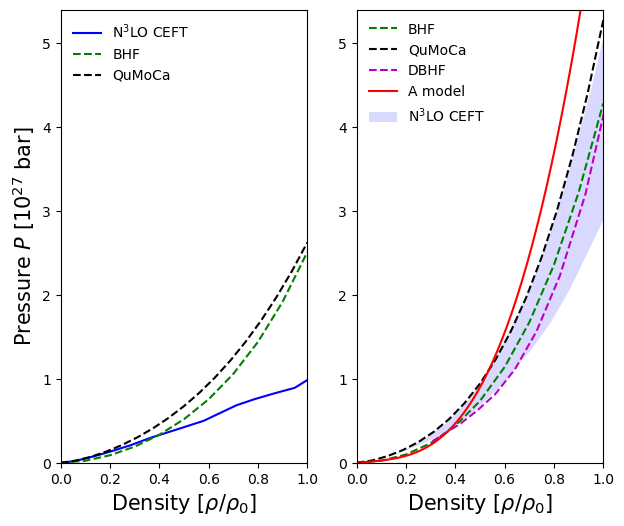

In [26]:
# Conversion factor to convert from [MeVfm^{-3}] to [10^{27} bar]
conversionFactor = 1.6022 # see Glendenning (p70-73) and Giancolli (p281)

# Saturation density
rho0 = 0.16

fig1 = plt.figure(figsize=(7,6))

#*********** NO THREE-BODY FORCES ********* 

ax1 = fig1.add_subplot(121)

#==========================
# Various data from Jirina
#==========================

# N3LO CEFT, PRL 110, 032504 (2013) from K. Hebeler via J. Stone
ax1.plot(EOS_no3NF[:,0]/rho0,EOS_no3NF[:,2]*conversionFactor,'b',label=r"N$^{3}$LO CEFT")

# BHF using Av18 (nn) and Av18 + UIX (nnn) from Isaac Vidana via J. Stone
ax1.plot(BHF[:,0],BHF[:,1],'g--',label=r"BHF")

# Quantum Monte Carlo (QuMoCa) from J. Stone
ax1.plot(QuMoCa[:,1],QuMoCa[:,2]/(10**27),'k--',label=r"QuMoCa")

# Limits
ax1.set_xlim(0,1)
ax1.set_ylim(0,5.4)

# Labels
ax1.set_xlabel(r"Density [$\rho / \rho_{0}$]",fontsize=fs)
ax1.set_ylabel(r"Pressure $P$ [$10^{27}$ bar]",fontsize=fs)

# Legend
ax1.legend(frameon=False, loc="upper left",fontsize=fs-5)


#*********** WITH THREE-BODY FORCES ********* 

ax2 = fig1.add_subplot(122)

#==========================
# Various data from Jirina
#==========================


# N3LO CEFT, PRL 110, 032504 (2013) from K. Hebeler via J. Stone
ax2.fill(EOS_with3NF_combined[:,0]/rho0,EOS_with3NF_combined[:,2]*conversionFactor,'b',alpha=0.15,label=r"N$^{3}$LO CEFT")

# BHF using Av18 (nn) and Av18 + UIX (nnn) from Isaac Vidana via J. Stone
ax2.plot(BHF[:,0],BHF[:,2],'g--',label=r"BHF")

# Quantum Monte Carlo (QuMoCa) from J. Stone
ax2.plot(QuMoCaUIX[:,1],QuMoCaUIX[:,2]/(10**27),'k--',label=r"QuMoCa")

# DBHF from Francesca Sammarruca via J. Stone
ax2.plot(DBHF[:,0]/rho0,10**(DBHF[:,1])*conversionFactor,'m--',label=r"DBHF")


#=======
# MODEL
#=======

# MODEL
ax2.plot(data[:,0]/rho0,data[:,1]*conversionFactor,'r-',label=MODEL)

# Limits
ax2.set_xlim(0,1)
ax2.set_ylim(0,5.4)

# Labels
ax2.set_xlabel(r"Density [$\rho / \rho_{0}$]",fontsize=fs)

# Legend
ax2.legend(frameon=False, loc="upper left",fontsize=fs-5)

# Save it
plt.savefig("pnm_test2.pdf")